# **Description du projet**
Dans cette partie, on s'intéresse au siteweb: imdb.com. Internet Movie Database
(littéralement, Base de données cinématographiques d'Internet), abrégé en IMDb,
est une base de données en ligne sur le cinéma mondial, sur la télévision, et plus
secondairement les jeux vidéo. IMDb restitue un grand nombre d'informations
concernant les films, les acteurs, les réalisateurs, les scénaristes et toutes personnes
et entreprises intervenant dans l'élaboration d'un film, d'un téléfilm, d'une
série télévisée ou d'un jeu vidéo. L'accès aux informations publiques est gratuit.

## **But**
Faire la collecte des données par le web scrapping, analyser des données et visualisation, et finalement, la création d'un modèle de prédiction afin de prédire 
la note qu'un utilisateur va donner à un film.

# Bibliothèque

In [2]:
!pip install beautifulsoup4 requests html5lib
!pip install fake-useragent

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 5.8 MB/s 


In [3]:
from bs4 import BeautifulSoup
import requests
from fake_useragent import UserAgent
import pandas as pd
import random
import time
from google.colab import files
import numpy as np 

# 5.1 Collecte des données

In [4]:
def next_page(page):
  url = "https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start={}&ref_=adv_nxt".format(page)
  return url

In [5]:
def getIdFilm(lien):
  link = lien.split("/")
  return str(link[5])[2:] if link else ""

In [6]:
def getTitreFilm(soup):
    titre = soup.find("h1", {"class": "sc-b73cd867-0 fbOhB"})
    if not titre:
      titre = soup.find("h1", {"class": "sc-b73cd867-0 eKrKux"})
      if not titre:
        titre = soup.find("h1", {"class": "sc-b73cd867-0 cAMrQp"})
    return titre.text.strip() if titre else ""

In [7]:
def getDateSortie(soup):
  annee = soup.find("li", {"data-testid": "title-details-releasedate"})
  if annee:
    try:
      annee_sortie = annee.find("div").text
      return annee_sortie.split("(")[0]
    except ValueError:
      return ""
  return ""

In [8]:
def getGenresListe(soup):
  content = soup.find("div", {"class": "ipc-chip-list__scroller"})
  categories = ""
  if content:
    for line in content:
      categories = categories +" "+ line.text
  return categories

In [9]:
def convertDuree(duree):
  token = duree.split()
  h = 0
  m = 0
  for line in token:
    if str(line).find("h") != -1:
      try:
        h = int(str(line).replace("h","")[-1])
      except ValueError:
        h = 0
      
    if str(line).find("m") != -1:
      try:
        m = int(str(line).replace("m",""))
      except ValueError:
        m = 0
  return str(h*60+m)+str(" min")

In [10]:
def getDuree(soup):
  try:
    duree = soup.find("ul", {"class": "ipc-inline-list ipc-inline-list--show-dividers sc-8c396aa2-0 kqWovI baseAlt"})
    i=1
    if duree:
      for line in duree:
        if i == 3:
          duree = line
        i = i + 1
      if duree:
        return convertDuree(duree.text.strip())
      else:
        return ""
  except ValueError:
    return ""

In [11]:
def getUtilisateurNote(soup):
  noteMoyenne = soup.find("span", {"class": "sc-7ab21ed2-1 jGRxWM"})
  return noteMoyenne.text.strip() if noteMoyenne else ""

In [12]:
def getNombreUtilisateurNote(soup):
  nombreNote= soup.find("div", {"class": "sc-7ab21ed2-3 dPVcnq"})
  return nombreNote.text.strip() if nombreNote else ""

In [13]:
# # user_agent = {'User-agent': UserAgent().random}
# user_agent = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36', 'Accept-Language': 'fr-CH, fr;q=0.9'}
# links_for_page = []
# for i in range(1,12954, 50):
#    url = next_page(i)
#    html_page = requests.get(url, headers=user_agent).text
#    soup = BeautifulSoup(html_page, 'html5lib')
#    data = soup.find_all("div",{"class": "lister-item mode-advanced"})
#    for line in data:
#      links_for_page.append(str("https://www.imdb.com/")+str(line.find("a").get("href")))

# movies_info = []
# for link in links_for_page:
#    current_page = requests.get(link,headers=user_agent).text
#    soup = BeautifulSoup(current_page,'html5lib')
#    id_film = getIdFilm(link)
#    titre_film = getTitreFilm(soup)
#    duree = getDuree(soup)
#    genres_liste = getGenresListe(soup)
#    date_sortie = getDateSortie(soup)
#    utilisateur_note = getUtilisateurNote(soup)
#    nbre_utilisateur_note = getNombreUtilisateurNote(soup)
#    movies_info.append([id_film,titre_film,duree,genres_liste,date_sortie,utilisateur_note,nbre_utilisateur_note])

# columns_name = ["id_film","titre_film","duree","genres_liste","date_sortie","utilisateur_note","nbre_utilisateur_note"]
# films = pd.DataFrame(movies_info,columns=columns_name)

In [14]:
# films.to_csv("films2000.csv", index=False)

In [15]:
missing_values = ["n/a", "na", "--",""]
films = pd.read_csv("FilmsTotal.csv",na_values=missing_values)
print(films.shape)
print(films)

(12950, 7)
       id_film              titre_film    duree  \
0      1825683           Black Panther  134 min   
1      1477834                 Aquaman  143 min   
2      4154756  Avengers: Infinity War  149 min   
3      5463162              Deadpool 2  119 min   
4      7784604                Hérédité  127 min   
...        ...                     ...      ...   
12945  6343314                Creed II  130 min   
12946  1502407               Halloween  106 min   
12947  1365519             Tomb Raider  119 min   
12948  5814060                La nonne   96 min   
12949  2854926                     Tag  100 min   

                           genres_liste         date_sortie utilisateur_note  \
0       Action Aventure Science-fiction    14 février 2018               7,3   
1           Action Aventure Fantastique   19 décembre 2018               6,8   
2       Action Aventure Science-fiction      25 avril 2018               8,4   
3               Action Aventure Comédie        16 mai 20

# 5.2 Exploitation des données

## 1. Nettoyage et Codage des données

In [16]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12950 entries, 0 to 12949
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id_film                12950 non-null  int64 
 1   titre_film             12949 non-null  object
 2   duree                  12949 non-null  object
 3   genres_liste           12643 non-null  object
 4   date_sortie            12732 non-null  object
 5   utilisateur_note       10320 non-null  object
 6   nbre_utilisateur_note  10320 non-null  object
dtypes: int64(1), object(6)
memory usage: 708.3+ KB


Supprimer les valeurs dupliquées

---



In [17]:
print("Initial: ",films.shape)
films = films.drop_duplicates()
print("Après suppression: ",films.shape)

Initial:  (12950, 7)
Après suppression:  (10005, 7)


Pour le titre du film

---



Apparamment les valeurs du titre du film sont correctes

Pour les genres des films

---



1. Créer une colonne pour chaque genre. Il ne faut laisser que les 5 genres
les plus cités et regrouper le reste dans une colonne autres genres
2. Encoder les colonnes

In [18]:
def get_genre_films(x,top_5):
  genre_dict = dict(zip(top_5,[0,0,0,0,0,0]))
  for val in str(x).strip().split(" "):
    val = str(val).strip()
    if val in genre_dict.keys():
      genre_dict[val] = 1
    else:
      genre_dict["autres_genres"] = 1
  return list(genre_dict.values())

In [19]:
#Nombre d'apparution des genres
genres = []
for genre in films['genres_liste']:
  for val in str(genre).strip().split():
    genres.append(val)
all_genre = pd.DataFrame(genres,columns = ["genre"])
top_cinq = all_genre.value_counts()[:5]
top_5 = []
for g in top_cinq.index:
  top_5.append(str(g).replace("(","").replace(")","").replace("'","").replace(",",""))

top_5.append("autres_genres")

print("\nLes nouvelles colonnes: ",top_5)


#Creation des 6 colonnes de genres (les 5 plus representés et les restes (autres_genres))
sommaire_genre = []
for line in films["genres_liste"]:
  sommaire_genre.append(get_genre_films(line,top_5))

#dataframe des genres
sommaire_genre_df = pd.DataFrame(sommaire_genre,columns=top_5,index=films.index)
# sommaire_genre
sommaire_genre_df.head(3)


Les nouvelles colonnes:  ['Drame', 'Comédie', 'Thriller', 'Horreur', 'Action', 'autres_genres']


,Drame,Comédie,Thriller,Horreur,Action,autres_genres
0,0,0,0,0,1,1
1,0,0,0,0,1,1
2,0,0,0,0,1,1


In [20]:
# Concatenation 
films = pd.concat([films,sommaire_genre_df],axis=1)
films.head(3)

,id_film,titre_film,duree,genres_liste,date_sortie,utilisateur_note,nbre_utilisateur_note,Drame,Comédie,Thriller,Horreur,Action,autres_genres
0,1825683,Black Panther,134 min,Action Aventure Science-fiction,14 février 2018,"7,3",764 k,0,0,0,0,1,1
1,1477834,Aquaman,143 min,Action Aventure Fantastique,19 décembre 2018,"6,8",473 k,0,0,0,0,1,1
2,4154756,Avengers: Infinity War,149 min,Action Aventure Science-fiction,25 avril 2018,"8,4","1,1 M",0,0,0,0,1,1


Pour la durée

---



1. Supprimer les films dont la durée n'est pas enregistrée
2. Convertir la durée du film en entier
3. Supprimer les films dont la durée est égale à 0
4. Supprimer les films dont la durée est très élevée

In [21]:
#Suppression Valeurs manquantes
print("Initial: ", films.shape)
films = films.dropna(subset=['duree'])
print("1. Taille après la suppression des valeurs manquantes:",films.shape)

#Conversion vers int
films['duree'] = films['duree'].apply(lambda x: str(x).split('min')[0]).astype(np.int64)
print("2. Type ",films['duree'].dtype)

#Supression duree == 0
films = films.loc[films["duree"] != 0]
print("3. Taille après la suppression (duree == 0):",films.shape)

#Supression des films avec une duree trop élevée
Q1 = films['duree'].quantile(0.25)
Q3 = films['duree'].quantile(0.75)
IQR = Q3 - Q1
max = films['duree'] > (Q3 + 1.5*IQR)
min = 0
index = ~(max | min)
films = films[index]
print("3. Taille après la suppression des valeurs trop élevées:",films.shape)

Initial:  (10005, 13)
1. Taille après la suppression des valeurs manquantes: (10004, 13)
2. Type  int64
3. Taille après la suppression (duree == 0): (8267, 13)
3. Taille après la suppression des valeurs trop élevées: (7805, 13)


Pour le nombre d'évaluations de chaque films

---



*Correction des types de données*

1. Convertir en valeur entière
2. Traiter les valeurs manquantes
3. Supprimer les films avec un nombre d'évaluation trop élevé

In [22]:
def convert_type(x):
  try:
    x = str(x)
    if x.strip()[-1] == 'k':
      return float(x[:-1].replace(",", ".")) * 1e3
    elif x.strip()[-1] == 'M':
      return float(x[:-1].replace(",", ".")) * 1e6
    else:
      return float(x)
  except ValueError:
    return ""

In [23]:
#Convertir vers int
films['nbre_utilisateur_note'] = films['nbre_utilisateur_note'].apply(lambda x: convert_type(x))
print("1. Type ",films['nbre_utilisateur_note'].dtype)

#Valeurs manquantes
films['nbre_utilisateur_note'].fillna(films['nbre_utilisateur_note'].median(), inplace=True)
print("2. Valeurs manquantes ",films["nbre_utilisateur_note"].isna().sum())

#Valeurs trop élevées
print("3. Taille avant la suppression des valeurs trop élevées:",films.shape)
Q1 = films['nbre_utilisateur_note'].quantile(0.25)
Q3 = films['nbre_utilisateur_note'].quantile(0.75)
IQR = Q3 - Q1
max = films['nbre_utilisateur_note'] > (Q3 + 1.5*IQR)
min = 0
index = ~(max | min)
films = films[index]
films["nbre_utilisateur_note"].mean()
print("   Taille après la suppression des valeurs trop élevées:",films.shape)

1. Type  float64
2. Valeurs manquantes  0
3. Taille avant la suppression des valeurs trop élevées: (7805, 13)
   Taille après la suppression des valeurs trop élevées: (6592, 13)


Pour la note moyenne du film

---



1. Convertir en valeur numérique (float)
2. Traiter les Valeurs manquantes
3. Supprimer les films avec une note moyenne trop élevée

In [24]:
def convertir_moyenne_note(x):
    try:
      return float(str(x).replace(",","."))
    except ValueError:
        return "" 

In [25]:
#Conversion de type
films['utilisateur_note'] = films['utilisateur_note'].apply(lambda x: convertir_moyenne_note(x))
print("1. Type: ",films['utilisateur_note'].dtype)

#Valeurs manquantes
films['utilisateur_note'].fillna(films['utilisateur_note'].median(), inplace=True)
print("2. Valeurs manquantes ",films["utilisateur_note"].isna().sum())

#Valeurs trop élevées
print("3. Taille avant la suppression des valeurs trop élevées:",films.shape)
Q1 = films['utilisateur_note'].quantile(0.25)
Q3 = films['utilisateur_note'].quantile(0.75)
IQR = Q3 - Q1
max = films['utilisateur_note'] > (Q3 + 1.5*IQR)
min = 0
index = ~(max | min)
films = films[index]
films["nbre_utilisateur_note"].mean()
print("   Taille après la suppression des valeurs trop élevées:",films.shape)


1. Type:  float64
2. Valeurs manquantes  0
3. Taille avant la suppression des valeurs trop élevées: (6592, 13)
   Taille après la suppression des valeurs trop élevées: (6506, 13)


Pour la date de sortie du film

---



1. Supprimer les films qui n'ont pas de date de sortie
2. Convertir au format datetime (nb. pour les films dont seulement l'année est donnée nous initiliserons la date au 01/01)

In [26]:
def convert_to_date_time(x):
  months = {"janvier":1, "février":2, "mars":3, "avril":4, "mai":5, "juin":6, "juillet":7, "août":8, "septembre":9, "octobre":10, "novembre":11, "décembre":12}
  # if " " in str(x):
  #   return x
  # else:
  parts = str(x).strip().split(' ')
  if len(parts) == 3:
    day = parts[0]
    month = str(months[parts[1].strip()])
    year = parts[2].strip()
    return day + "/" + month + "/" + year
  else:
    if len(parts) == 2:
      month = str(months[parts[0].strip()])
      year = parts[1].strip()
      return "01" + "/" + month + "/" + year
    else:
      year = parts[0].strip()
      return "01" + "/" + "01" + "/" + year

In [27]:
films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6506 entries, 81 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_film                6506 non-null   int64  
 1   titre_film             6506 non-null   object 
 2   duree                  6506 non-null   int64  
 3   genres_liste           6425 non-null   object 
 4   date_sortie            6367 non-null   object 
 5   utilisateur_note       6506 non-null   float64
 6   nbre_utilisateur_note  6506 non-null   float64
 7   Drame                  6506 non-null   int64  
 8   Comédie                6506 non-null   int64  
 9   Thriller               6506 non-null   int64  
 10  Horreur                6506 non-null   int64  
 11  Action                 6506 non-null   int64  
 12  autres_genres          6506 non-null   int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 711.6+ KB


In [28]:
#Suppression des films sans date
print("Initial: ", films.shape)
films = films.dropna(subset=['date_sortie'])
print("1. Taille après la suppression des valeurs manquantes:",films.shape)

#Format de la date
films['date_sortie'] = films['date_sortie'].apply(lambda x: convert_to_date_time(x))
films['date_sortie'] = pd.to_datetime(films['date_sortie'], format='%d/%m/%Y', errors='coerce')
print("2. Type: ", films['date_sortie'].dtype)

Initial:  (6506, 13)
1. Taille après la suppression des valeurs manquantes: (6367, 13)
2. Type:  datetime64[ns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
films

,id_film,titre_film,duree,genres_liste,date_sortie,utilisateur_note,nbre_utilisateur_note,Drame,Comédie,Thriller,Horreur,Action,autres_genres
81,8255490,Surviving Christmas with the Relatives,101,Comédie,2018-11-30,5.1,993.0,0,1,0,0,0,0
219,4299774,Strangeways Here We Come,86,Comédie Policier,2018-10-05,5.2,353.0,0,1,0,0,0,1
234,5658672,Peripheral,89,Horreur Science-fiction,2018-08-03,4.8,230.0,0,0,0,1,0,1
263,5218736,Leviano,102,Policier Drame Mystère,2018-07-05,4.6,315.0,1,0,0,0,0,1
282,7243754,Dirty Work,73,Drame Romantique Thriller,2018-02-03,3.3,381.0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,12206240,Madama Butterfly - Wiener Staatsoper,145,Musical,2018-12-07,5.8,150.0,0,0,0,0,0,1
9990,8505586,Madelline,66,Drame,2018-03-26,5.8,150.0,1,0,0,0,0,0
9991,8613960,Au bonheur des dames?,68,NaN,2018-10-24,5.8,150.0,0,0,0,0,0,1
9997,7697474,Those Who Can,110,Comédie,2018-07-17,5.8,150.0,0,1,0,0,0,0


##2. Créer deux nouvelles colonnes **durée_minutes_log**, **nbre_utilisateur_note_log**.

In [30]:
films['duree_minutes_log'] = np.log(films['duree'])
films['nbre_utilisateur_note_log'] = np.log(films['nbre_utilisateur_note'])
films.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id_film,titre_film,duree,genres_liste,date_sortie,utilisateur_note,nbre_utilisateur_note,Drame,Comédie,Thriller,Horreur,Action,autres_genres,duree_minutes_log,nbre_utilisateur_note_log
81,8255490,Surviving Christmas with the Relatives,101,Comédie,2018-11-30,5.1,993.0,0,1,0,0,0,0,4.615121,6.900731
219,4299774,Strangeways Here We Come,86,Comédie Policier,2018-10-05,5.2,353.0,0,1,0,0,0,1,4.454347,5.866468


# 3. Réaliser une analyse univariée complète avec les visualisations adéquates et interpréter les résultats.

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

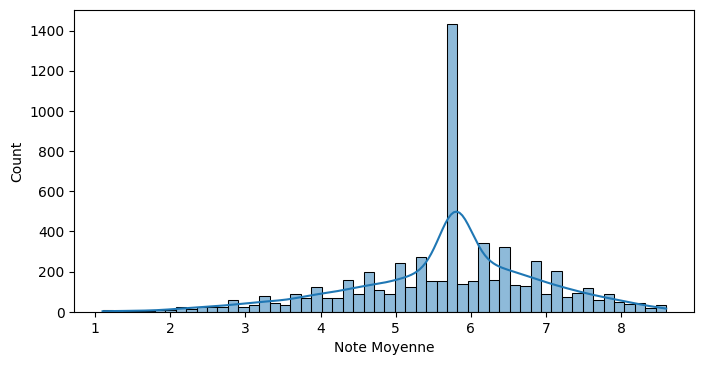

In [32]:
plt.figure(figsize=(8, 4), dpi=100)
sns.histplot(data=films, x="utilisateur_note",kde=True)
plt.xlabel("Note Moyenne");

*Interprétation: on voit que la note moyenne des utilisateurs est distribuée normalement, donc la plus part des valeurs est au tour du centre (entre 5 et 7)*

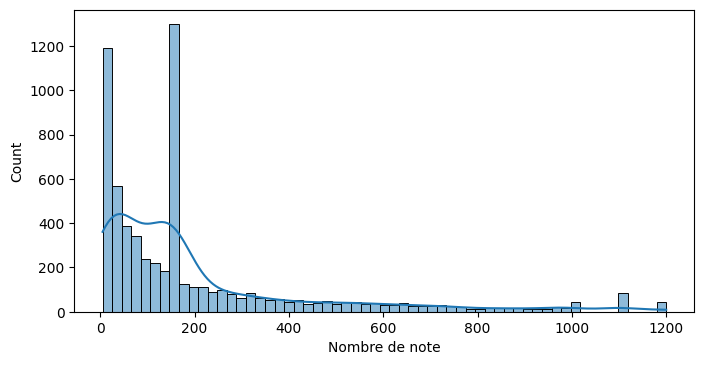

In [33]:
#nbre_utilisateur_note (identique au logarithme)
plt.figure(figsize=(8, 4), dpi=100)
sns.histplot(data=films, x="nbre_utilisateur_note",kde=True)
plt.xlabel("Nombre de note");

*Interprétation: le nombre de note des utilisateurs suit une distribution asymétrique à gauche.*

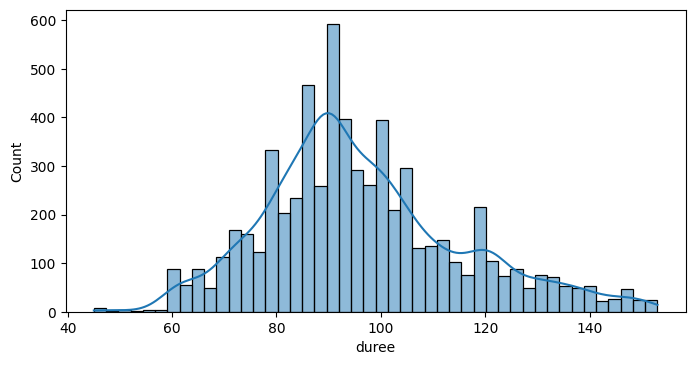

In [34]:
# Colonne duree
plt.figure(figsize=(8, 4), dpi=100)
sns.histplot(data=films, x="duree", kde=True)
plt.xlabel("duree");

***Interprétation : on voit que la durée des films est distribuée normalement, donc la plus part des valeurs est au tour du centre (entre 80 et 120)***

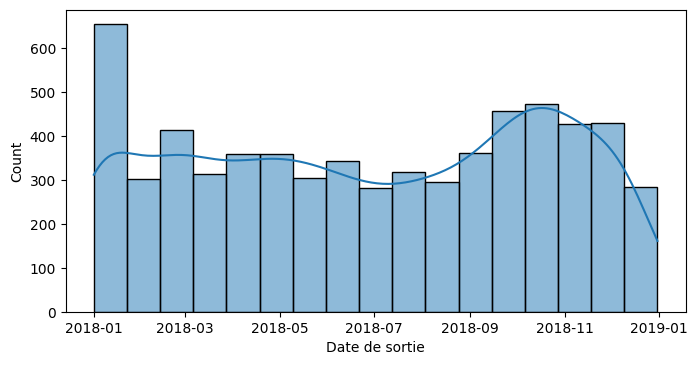

In [35]:
plt.figure(figsize=(8, 4), dpi=100)
sns.histplot(data=films, x="date_sortie", kde=True)
plt.xlabel("Date de sortie");

*Interprétation: la date de sortie des films suit une distribution uniforme.*

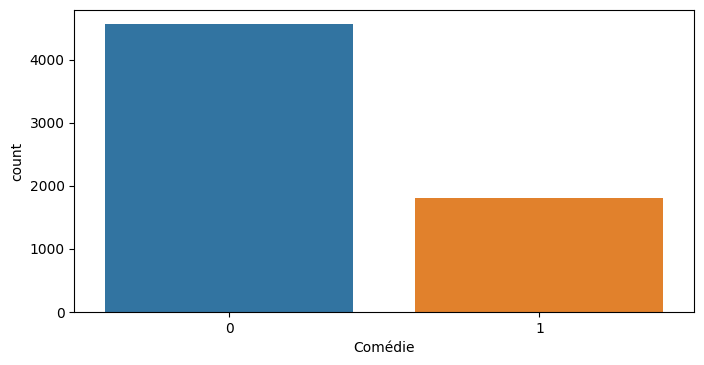

In [36]:
plt.figure(figsize=(8, 4), dpi=100)
sns.countplot(data=films,x="Comédie")
plt.xlabel("Comédie");

*Interprétation: le genre Comédie est peu représenté dans l'ensemble des données.*

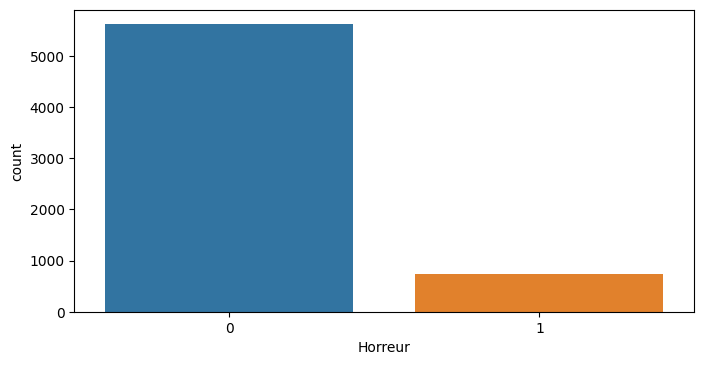

In [37]:
plt.figure(figsize=(8, 4), dpi=100)
sns.countplot(data=films,x="Horreur")
plt.xlabel("Horreur");

*Interprétation: le genre Horreur est très peu représenté dans l'ensemble des données.*

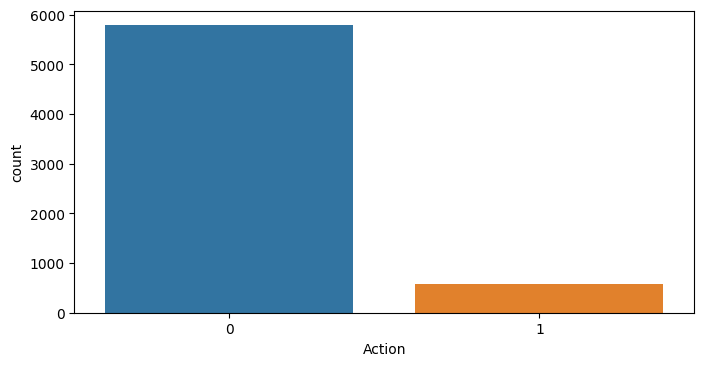

In [38]:
plt.figure(figsize=(8, 4), dpi=100)
sns.countplot(data=films,x="Action")
plt.xlabel("Action");

*Interprétation: le genre Action est très peu représenté dans l'ensemble des données.*

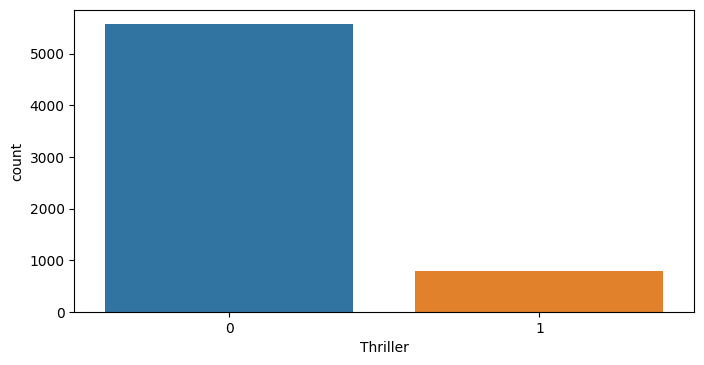

In [39]:
plt.figure(figsize=(8, 4), dpi=100)
sns.countplot(data=films,x="Thriller")
plt.xlabel("Thriller");

*Interprétation: le genre Thriller est très peu représenté dans l'ensemble des données.*

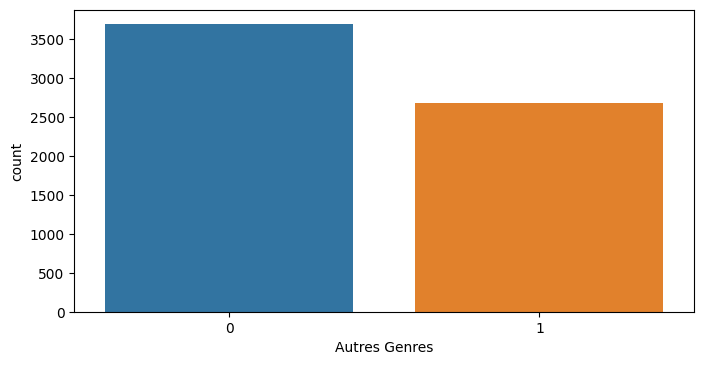

In [40]:
plt.figure(figsize=(8, 4), dpi=100)
sns.countplot(data=films,x="autres_genres")
plt.xlabel("Autres Genres");

*Interprétation: le genre Autre est très représenté dans l'ensemble des données.*\
**Note: la plus part des films ont des genres autres que : Comédie, Thriller, Action, Horreur et Drame.**

# 4. Réaliser une analyse bivariée complète avec les visualisations adéquates et interpréter les résultats.

Pour cette question, nous avons fait une généralisation sur la plupart des analyses bivariées. Nous avons répresenté pour chaque combinaison possible un exemple.

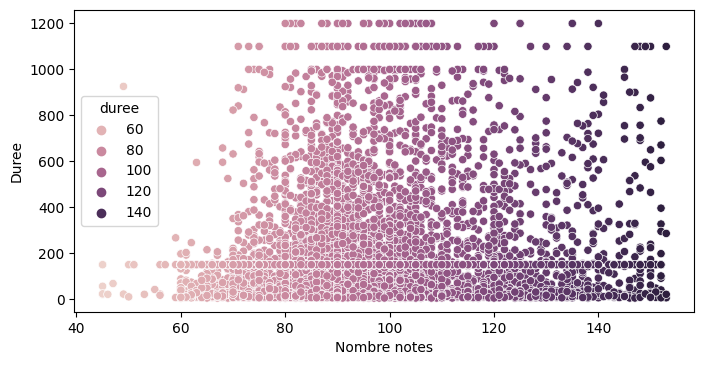

In [41]:
plt.figure(figsize=(8, 4), dpi=100)
sns.scatterplot(data=films,x="duree",y="nbre_utilisateur_note", hue="duree")
plt.xlabel("Nombre notes")
plt.ylabel("Duree");

*Interprétation: Nous constatons qu'il n y a aucune relation entre la durée d'un film et le nombre d'utilisateur qui ont donné une note.*

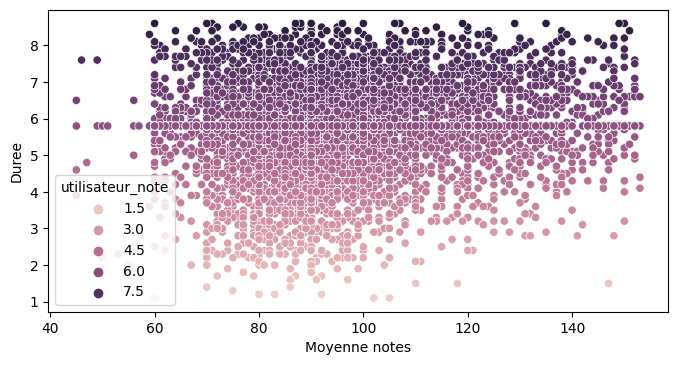

In [42]:
plt.figure(figsize=(8, 4), dpi=100)
sns.scatterplot(data=films,x="duree",y="utilisateur_note", hue="utilisateur_note")
plt.xlabel("Moyenne notes")
plt.ylabel("Duree");

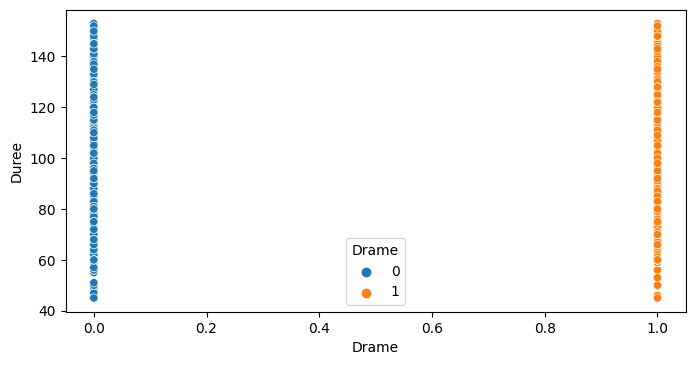

In [43]:
plt.figure(figsize=(8, 4), dpi=100)
sns.scatterplot(data=films,y="duree",x="Drame", hue="Drame")
plt.xlabel("Drame")
plt.ylabel("Duree");

Text(0, 0.5, 'Duree')

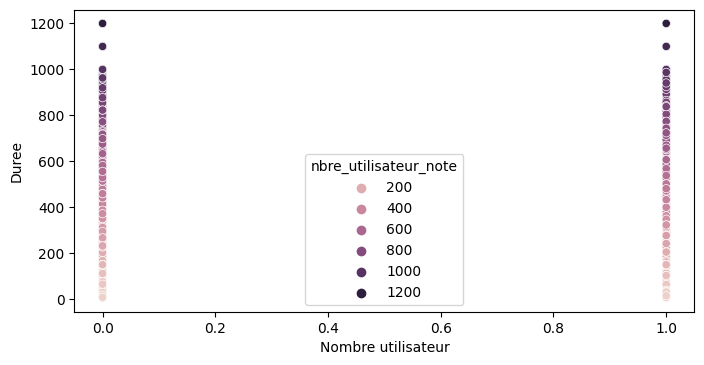

In [66]:
plt.figure(figsize=(8, 4), dpi=100)
sns.scatterplot(data=films,x="Drame",y="nbre_utilisateur_note", hue="nbre_utilisateur_note")
plt.xlabel("Nombre utilisateur");
plt.ylabel("Duree")

*Il n y a aucune relation entre la durée d'un film et le nombre d'utilisateur qui ont voté.*

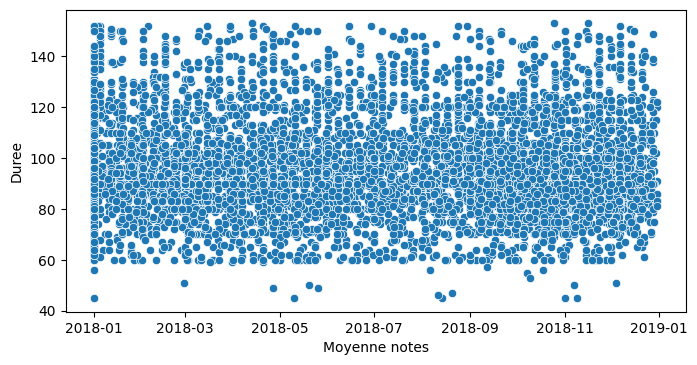

In [65]:
plt.figure(figsize=(8, 4), dpi=100)
sns.scatterplot(data=films,x="date_sortie",y="duree")
plt.xlabel("Date de sortie");
plt.ylabel("Duree");

***Interprétation: Nous constatons qu'il n y a aucune relation entre la durée d'un film et sa date de sortie.***

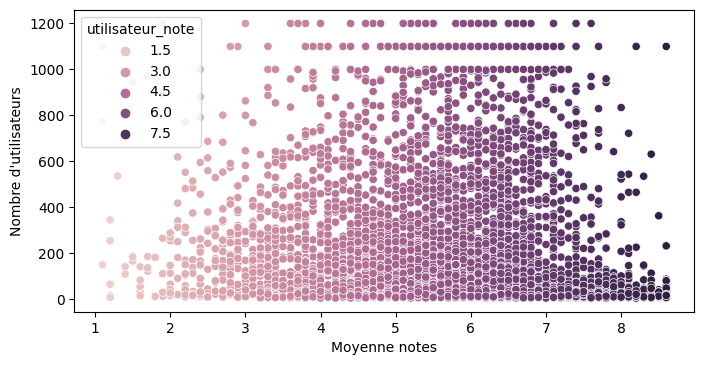

In [46]:
plt.figure(figsize=(8, 4), dpi=100)
sns.scatterplot(data=films,y="nbre_utilisateur_note",x="utilisateur_note", hue='utilisateur_note')
plt.xlabel("Moyenne notes")
plt.ylabel("Nombre d'utilisateurs");

*Interprétation: Le nombre d'utilisateurs n'est pas lié avec la note donnée. Don, aucune relation entre ces 2*

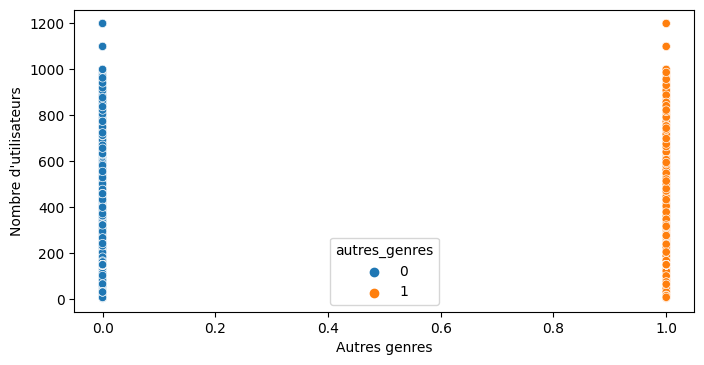

In [47]:
plt.figure(figsize=(8, 4), dpi=100)
sns.scatterplot(data=films,y="nbre_utilisateur_note",x="autres_genres", hue='autres_genres')
plt.xlabel("Autres genres")
plt.ylabel("Nombre d'utilisateurs");

*Interprétation: Le nombre d'utilisateurs n'est pas lié avec le genre de film.*

In [48]:
films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6367 entries, 81 to 9999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id_film                    6367 non-null   int64         
 1   titre_film                 6367 non-null   object        
 2   duree                      6367 non-null   int64         
 3   genres_liste               6292 non-null   object        
 4   date_sortie                6367 non-null   datetime64[ns]
 5   utilisateur_note           6367 non-null   float64       
 6   nbre_utilisateur_note      6367 non-null   float64       
 7   Drame                      6367 non-null   int64         
 8   Comédie                    6367 non-null   int64         
 9   Thriller                   6367 non-null   int64         
 10  Horreur                    6367 non-null   int64         
 11  Action                     6367 non-null   int64         
 12  autre

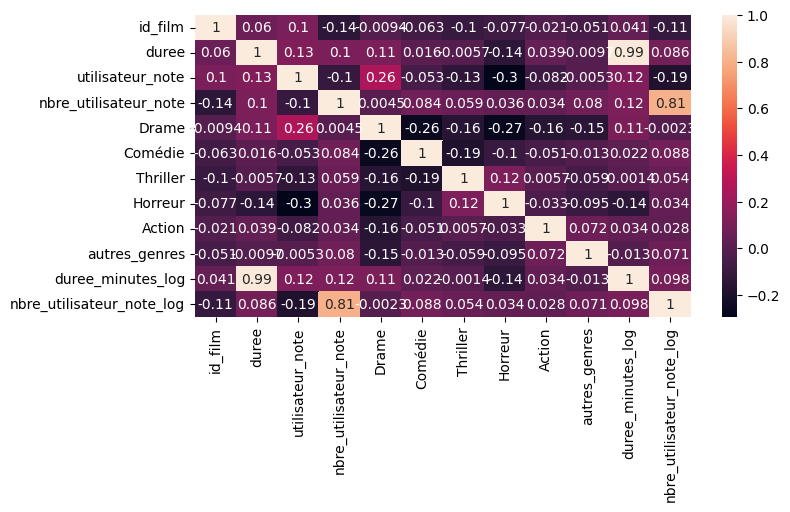

In [49]:
plt.figure(figsize=(8, 4), dpi=100)
sns.heatmap(data=films.corr(), annot=True)

<Figure size 1200x800 with 0 Axes>

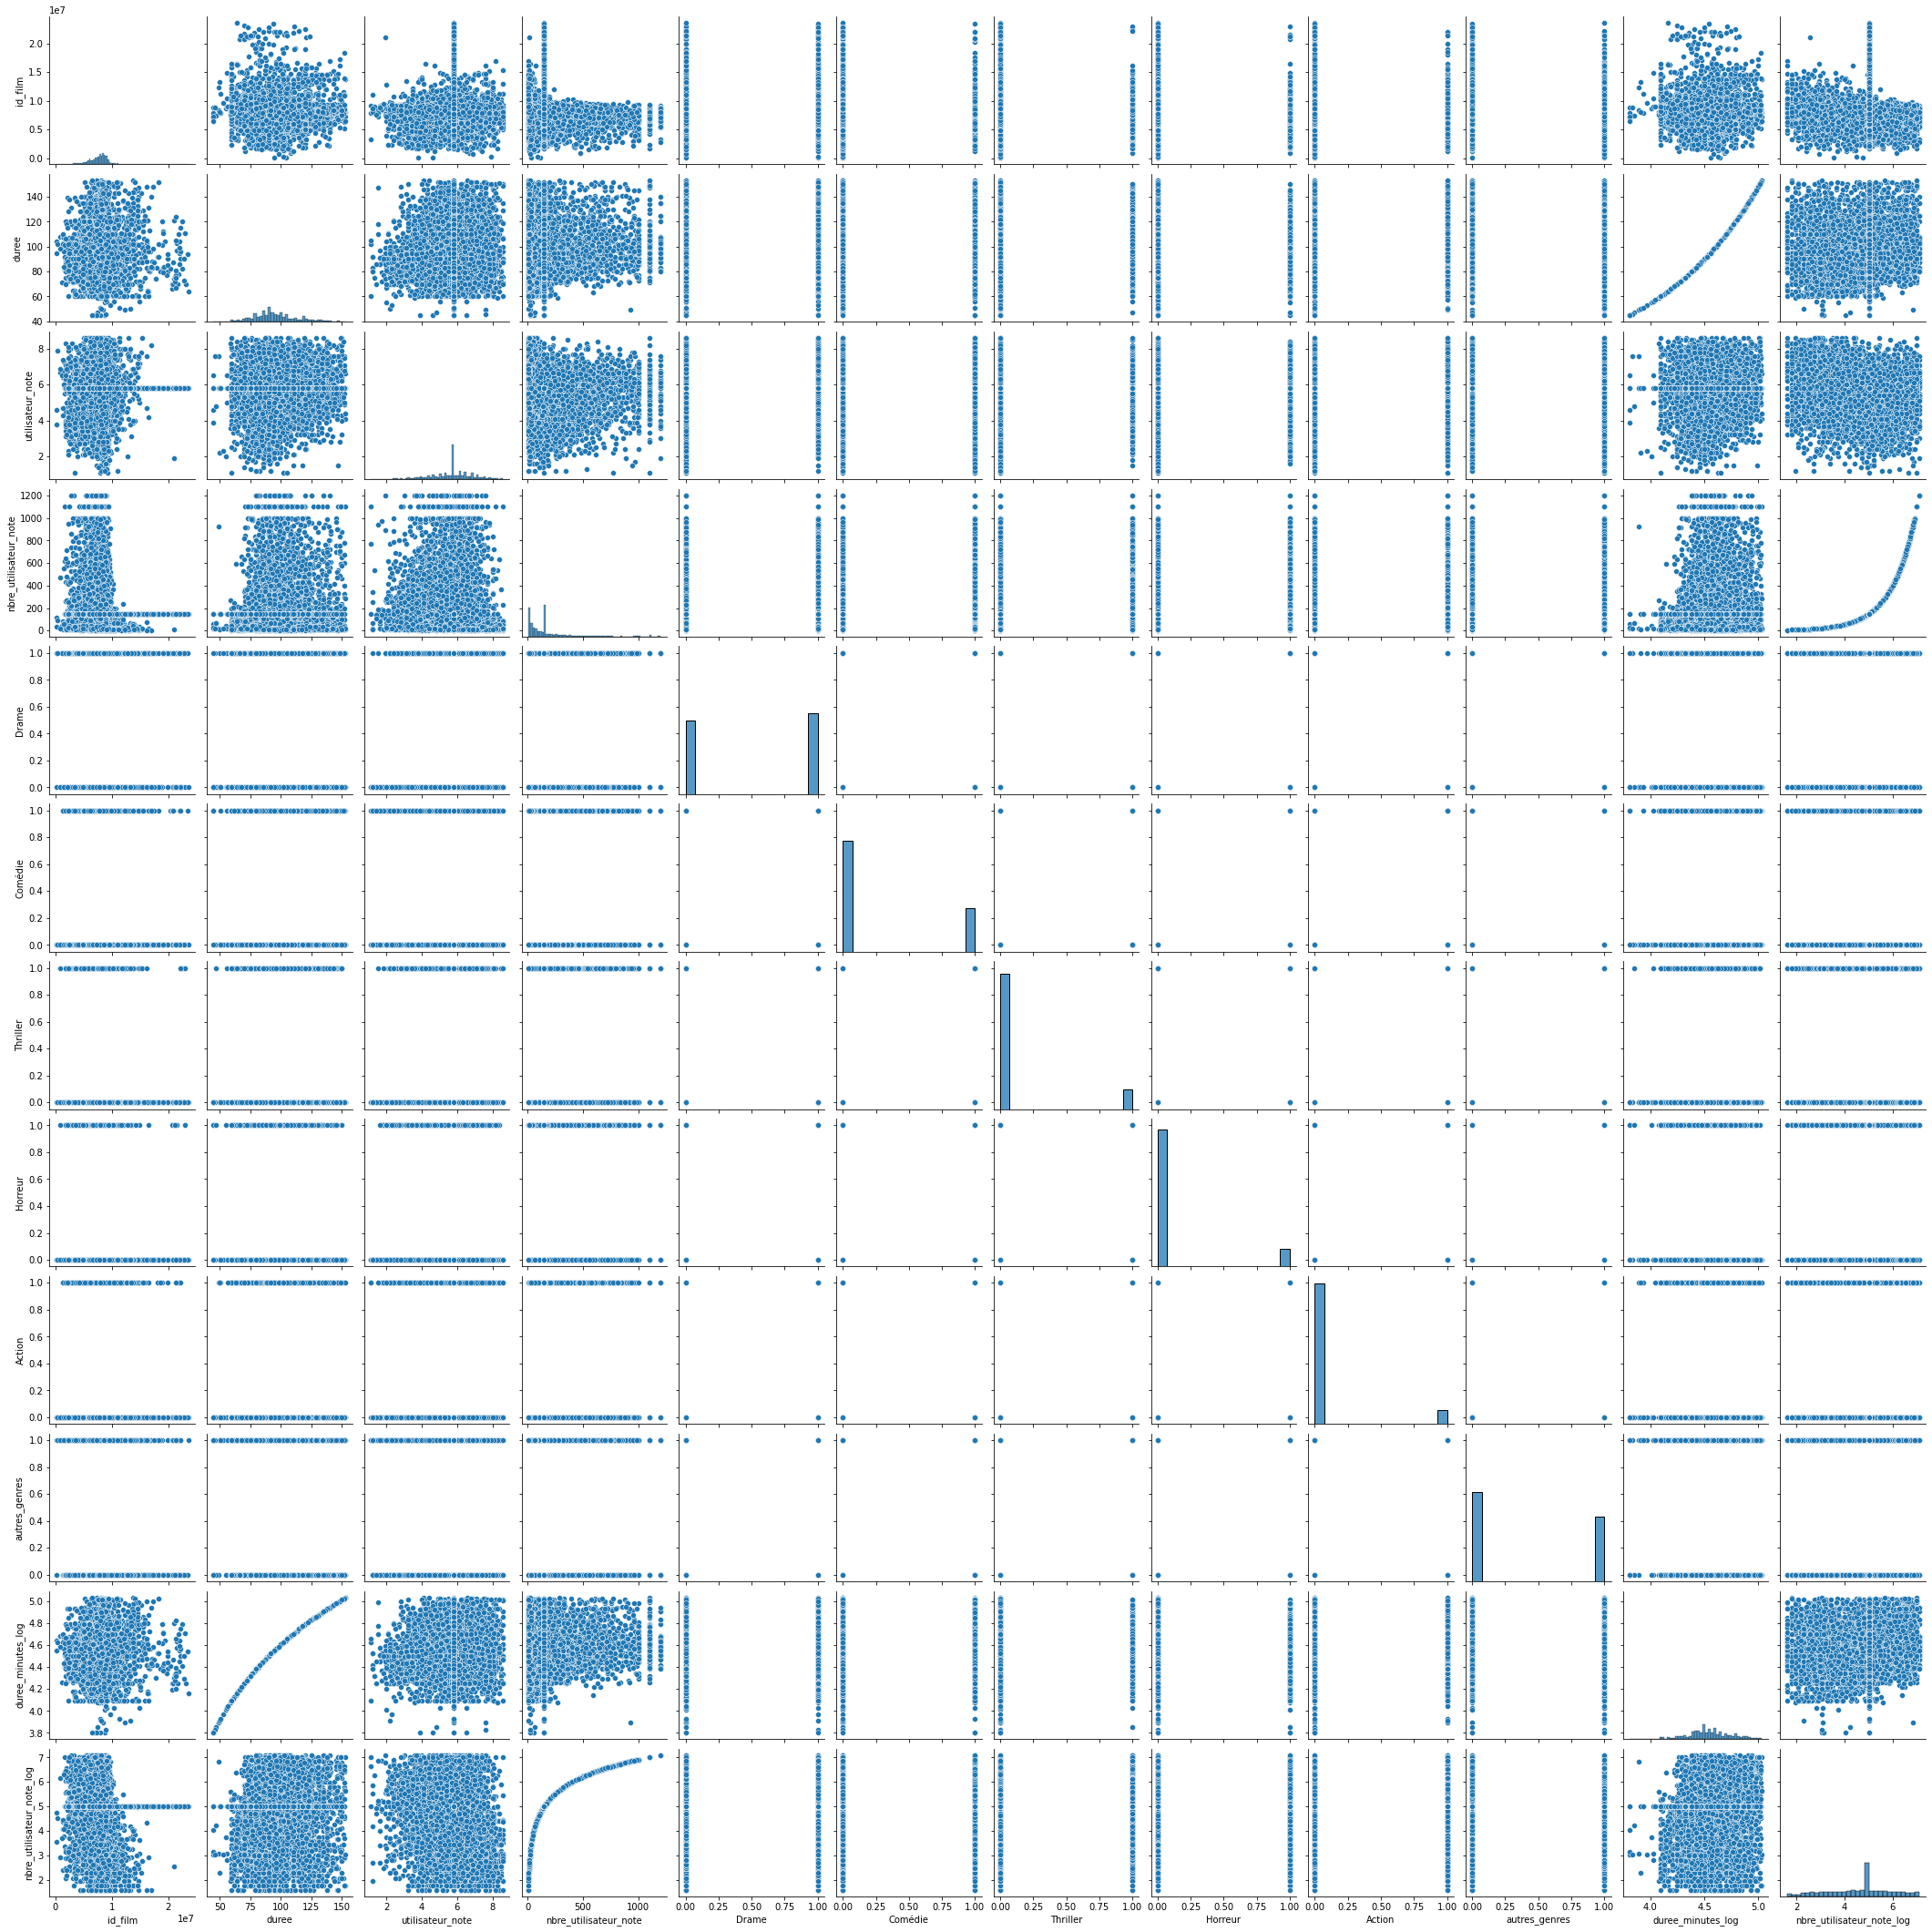

In [67]:
plt.figure(figsize=(12, 8), dpi=100)
sns.pairplot(data=films);

# 5. Conception d'un modèle de régression linéaire pour prédire la note d'un film.
Vérification des 4 conditions nécessaires pour appliquer la régression

In [50]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

Partage des données en entraînement et test (80% pour l'entraînement)

In [51]:
X = films[['nbre_utilisateur_note_log', 'duree_minutes_log', 'Drame', 'Action', 'Thriller', 'Horreur']]
y = films['utilisateur_note']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [52]:
# Entraînement du modèle
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       utilisateur_note   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     149.5
Date:                Mon, 28 Nov 2022   Prob (F-statistic):          1.32e-172
Time:                        04:16:15   Log-Likelihood:                -6592.0
No. Observations:                4265   AIC:                         1.320e+04
Df Residuals:                    4258   BIC:                         1.324e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         3.5125      0.411      8.536      0.000       2.706       4.319
nbre_utilisateur_note_log    -0.1755      0.013    -13.139      0.000      -0.202      -0.149
duree_minutes_log             0.6334      0.091      6.965      0.000       0.455       0.812
Drame                         0.4443      0.037     12.000      0.000       0.372       0.517
Action                       -0.1986      0.062     -3.201      0.001      -0.320      -0.077
Thriller                     -0.2854      0.053     -5.357      0.000      -0.390      -0.181
Horreur                      -0.8695      0.057    -15.169      0.000      -0.982      -0.757
==============================================================================
Omnibus:                      225.919   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.018
Skew:                          -0.504   Prob(JB):                     4.31e-66
Kurtosis:                       3.822   Cond. No.                         161.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Prédictions
y_pred = model.predict(X_test)
y_pred

9180    5.716160
1053    5.534984
5401    5.670754
1493    5.740700
9281    6.322053
          ...   
5808    5.065968
4464    4.997944
5866    5.324068
1838    5.127935
1016    5.670489
Length: 2102, dtype: float64

In [54]:
# Evaluation du modèle
print("Mean absolute Error : ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error : ", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean absolute Error :  0.8726371333884936
Mean Squared Error :  1.318899132938844
Root Mean Squared Error :  1.1484333384828411


**Vérification des conditions de validation de la régression linéaire**

1. Rélation linéaire entre les variables explicatives et la variable de réponse

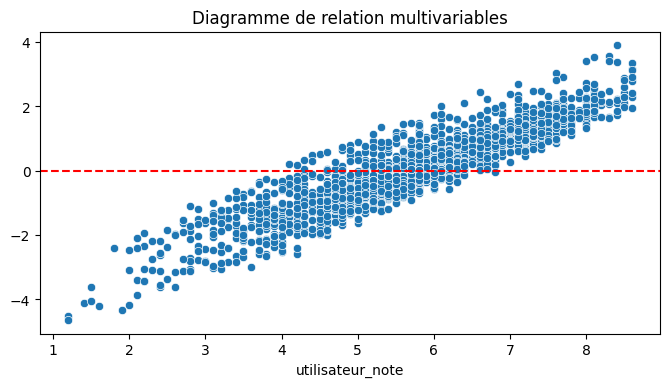

In [55]:
rest_res = y_test - y_pred

plt.figure(figsize=(8, 4), dpi=100)
plt.title("Diagramme de relation multivariables")
sns.scatterplot(x=y_test, y=rest_res)
plt.axhline(y=0, color='r', linestyle='--');

*Nous pouvons voir une relation linéaire entre les prédicteurs et la variable de reponse*

2. Résidus presque normaux avec une moyenne centrée à 0

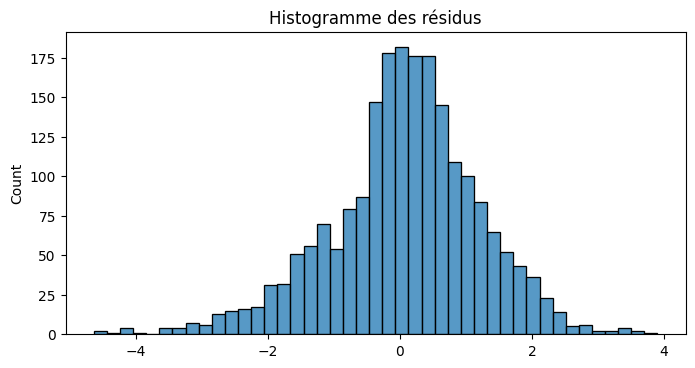

In [56]:
plt.figure(figsize=(8, 4), dpi=100)
plt.title("Histogramme des résidus")
sns.histplot(x=rest_res);

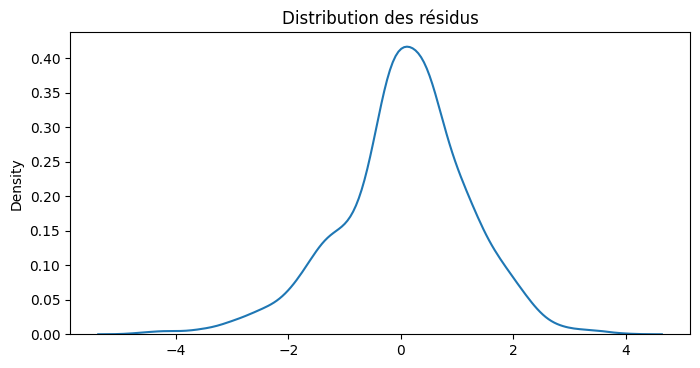

In [57]:
plt.figure(figsize=(8, 4), dpi=100)
plt.title("Distribution des résidus")
sns.kdeplot(rest_res);

*La distribution des résidus a tendance à être centrée à 0.*

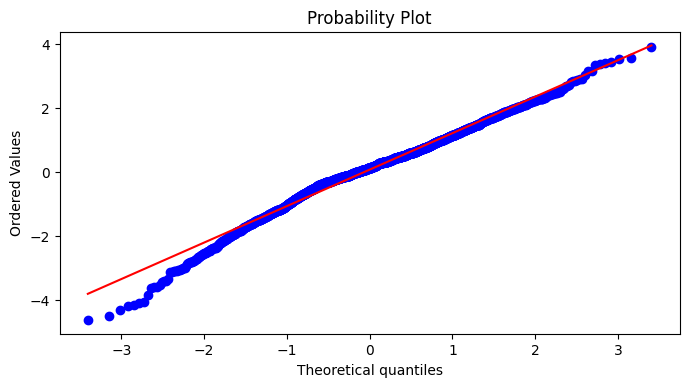

In [58]:
# Avec un graphique de probabilité normale
import scipy as sp
fig, ax = plt.subplots(figsize=(8,4),dpi=100)
# probplot renvoie les valeurs brutes si nécessaire
# nous voulons juste voir le graphique, donc nous assignons ces valeurs à _
_ = sp.stats.probplot(rest_res,plot=ax);

3. Variabilité constante des résidus

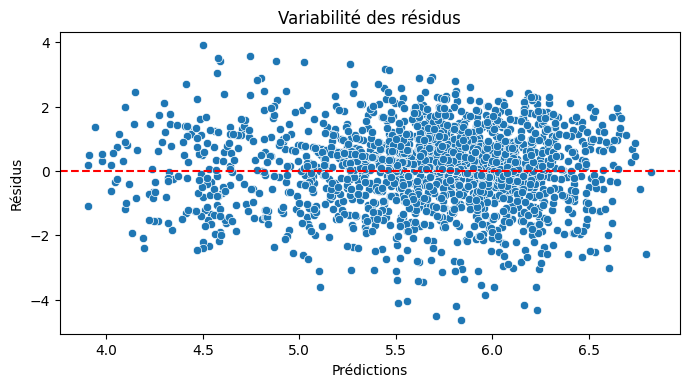

In [59]:
plt.figure(figsize=(8, 4), dpi=100)
plt.title("Variabilité des résidus")
sns.scatterplot(x=y_pred, y=rest_res)
plt.xlabel("Prédictions")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--');

*Nous pouvons voir que les résidus sont dispersés hasardement avec une largeur constante au tour de 0.*\
*Et la dispersion n'a pas de forme comme un éventail*

4. Résidus indépendants

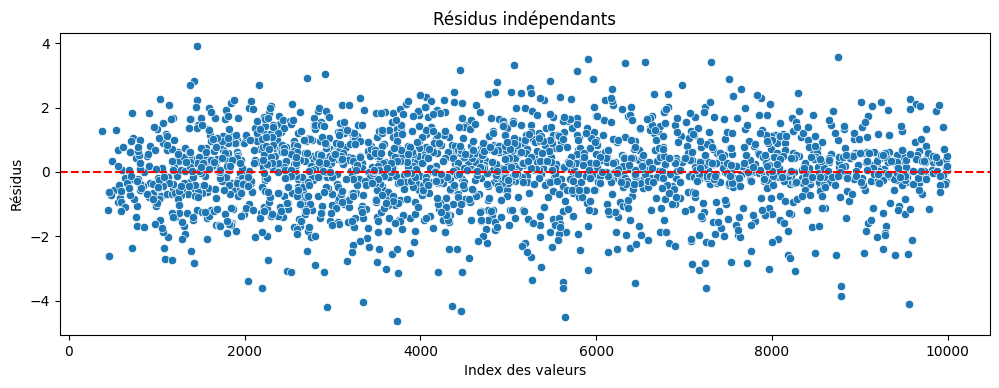

In [60]:
plt.figure(figsize=(12, 4), dpi=100)
plt.title("Résidus indépendants")
sns.scatterplot(x=y_pred.index, y=rest_res)
plt.xlabel("Index des valeurs")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--');

# 6. Refaire la question précedente après avoir effectuer une normalisation adéquate. Comparer les résutlats.

In [61]:
# Mise à l'échelle des données (entraînement et test)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Entraînement du modèle
model2 = sm.OLS(y_train, scaled_X_train).fit()
model2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       utilisateur_note   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):              0.007
Method:                 Least Squares   F-statistic:                              5.764
Date:                Mon, 28 Nov 2022   Prob (F-statistic):                    5.48e-06
Time:                        04:16:18   Log-Likelihood:                         -13535.
No. Observations:                4265   AIC:                                  2.708e+04
Df Residuals:                    4259   BIC:                                  2.712e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        nan           0           0
x1            -0.2303      0.089     -2.580      0.010      -0.405      -0.055
x2             0.1238      0.091      1.368      0.171      -0.054       0.301
x3             0.2219      0.094      2.357      0.018       0.037       0.406
x4            -0.0565      0.090     -0.629      0.530      -0.233       0.120
x5            -0.0945      0.090     -1.052      0.293      -0.270       0.082
x6            -0.2778      0.093     -2.979      0.003      -0.461      -0.095
==============================================================================
Omnibus:                      225.919   Durbin-Watson:                   0.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.018
Skew:                          -0.504   Prob(JB):                     4.31e-66
Kurtosis:                       3.822   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [62]:
# Prédictions
y_pred = model2.predict(X_test)
y_pred

9180   -0.551499
1053   -0.574786
5401   -0.425370
1493   -0.385959
9281    0.096952
          ...   
5808   -0.541447
4464   -0.525283
5866   -0.628147
1838   -0.818753
1016   -0.663788
Length: 2102, dtype: float64

In [63]:
# Evaluation du modèle
print("Mean absolute Error : ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error : ", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean absolute Error :  6.157298865840432
Mean Squared Error :  39.29910446564821
Root Mean Squared Error :  6.268899781113765


*Nous pouvons voir dans ces 2 cas, que les données non mise à l'échelle donnent des erreurs plus faibles par rapport à celles mises à l'échelle*